### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [11]:
data.shape

(12684, 26)

In [10]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [13]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [14]:
data.isin(["", "NA", "N/A", "unknown", "None"]).sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [16]:
data.duplicated().sum()

np.int64(74)

In [17]:
data = data.drop_duplicates()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon?



In [21]:
proportion_accepted = data["Y"].mean()
proportion_accepted

np.float64(0.5675654242664552)

5. Use a bar plot to visualize the `coupon` column.

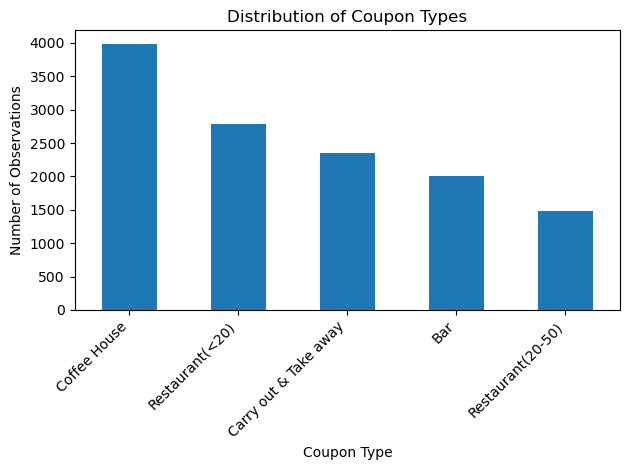

In [24]:
coupon_counts = data["coupon"].value_counts()

coupon_counts.plot(kind="bar")
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

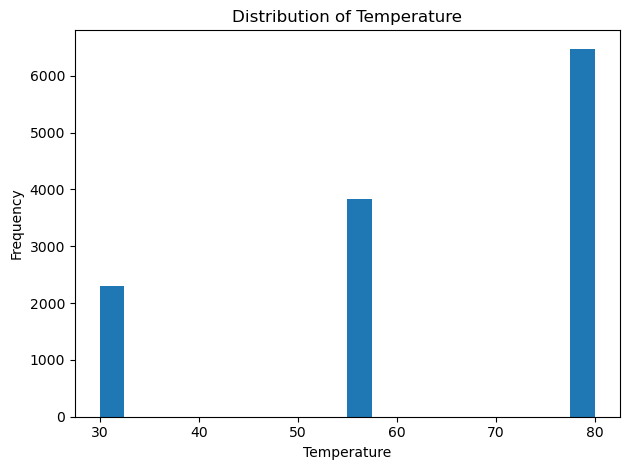

In [27]:
plt.hist(data["temperature"], bins=20)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
bar_coupons = data[data["coupon"] == "Bar"]

2. What proportion of bar coupons were accepted?


In [29]:
bar_accepted = bar_coupons["Y"].mean()
bar_accepted

np.float64(0.4099502487562189)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [39]:
low_bar_visits = bar_coupons[bar_coupons["Bar"].isin(["never", "less1", "1~3"])]
high_bar_visits = bar_coupons[bar_coupons["Bar"].isin(["4~8", "gt8"])]

low_acceptance_rate = low_bar_visits["Y"].mean()
high_acceptance_rate = high_bar_visits["Y"].mean()

low_acceptance_rate, high_acceptance_rate

(np.float64(0.370391061452514), np.float64(0.7688442211055276))

In [40]:
print(f"Acceptance rate (≤3 bar visits/month): {low_acceptance_rate:.2%}")
print(f"Acceptance rate (>3 bar visits/month): {high_acceptance_rate:.2%}")

Acceptance rate (≤3 bar visits/month): 37.04%
Acceptance rate (>3 bar visits/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:
group_a = bar_coupons[
    bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"]) &
    (~bar_coupons["age"].isin(["below21", "21"]))
]
group_b = bar_coupons.drop(group_a.index)

rate_a = group_a["Y"].mean()
rate_b = group_b["Y"].mean()

rate_a, rate_b

(np.float64(0.6952380952380952), np.float64(0.33459119496855344))

In [42]:
print(f"Acceptance rate (bar >1/month & age >25): {rate_a:.2%}")
print(f"Acceptance rate (all others): {rate_b:.2%}")
print(f"Difference: {(rate_a - rate_b):.2%}")

Acceptance rate (bar >1/month & age >25): 69.52%
Acceptance rate (all others): 33.46%
Difference: 36.06%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [43]:
group_a = bar_coupons[
    bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"]) &
    (bar_coupons["passanger"] != "Kid") &
    (bar_coupons["occupation"] != "Farming Fishing Forestry")
]
group_b = bar_coupons.drop(group_a.index)

rate_a = group_a["Y"].mean()
rate_b = group_b["Y"].mean()

rate_a, rate_b

(np.float64(0.6879194630872483), np.float64(0.2927864214992928))

In [44]:
print(
    f"Acceptance rate (bar >1/month, no kid passenger, non-FFF occupation): {rate_a:.2%}"
)
print(f"Acceptance rate (all others): {rate_b:.2%}")
print(f"Difference: {(rate_a - rate_b):.2%}")

Acceptance rate (bar >1/month, no kid passenger, non-FFF occupation): 68.79%
Acceptance rate (all others): 29.28%
Difference: 39.51%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [37]:
cond1 = (
    bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"]) &
    (bar_coupons["passanger"] != "Kid") &
    (bar_coupons["maritalStatus"] != "Widowed")
)
cond2 = (
    bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"]) &
    (bar_coupons["age"].isin(["below21", "21", "26"]))
)
cond3 = (
    bar_coupons["RestaurantLessThan20"].isin(["4~8", "gt8"]) &
    bar_coupons["income"].isin([
        "Less than $12500",
        "$12500 - $24999",
        "$25000 - $37499",
        "$37500 - $49999"
    ])
)

group_a = bar_coupons[cond1 | cond2 | cond3]
group_b = bar_coupons.drop(group_a.index)

rate_a = group_a["Y"].mean()
rate_b = group_b["Y"].mean()

rate_a, rate_b

(np.float64(0.5753086419753086), np.float64(0.29833333333333334))

In [38]:
print(f"Acceptance rate (meets ≥1 condition): {rate_a:.2%}")
print(f"Acceptance rate (all others): {rate_b:.2%}")
print(f"Difference: {(rate_a - rate_b):.2%}")

Acceptance rate (meets ≥1 condition): 57.53%
Acceptance rate (all others): 29.83%
Difference: 27.70%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on these observations, I hypothesize that drivers who accepted the bar coupons were:
1) More likely to already visit bars more than 3 times per month.
2) More likely to be over the age of 25.
3) More likely to have a passenger who was not a child.
4) Less likely to be widowed.
5) More likely to visit cheap restaurants, meaning that a coupon could make a difference between whether they could afford the bar visit or not.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [45]:
# Investigate unique coupon types
data["coupon"].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [54]:
# Create dataframe with only Coffee House coupons to explore
coffee_coupons = data[data["coupon"] == "Coffee House"]

In [55]:
# Explore overall rate that coffee coupons are accepted
coffee_accepted = coffee_coupons["Y"].mean()
coffee_accepted

np.float64(0.4986212083228879)

In [57]:
# Explore acceptance rates by travel time to coupon location
acceptance_rates = {
    "toCoupon_GEQ5min": coffee_coupons.loc[
        coffee_coupons["toCoupon_GEQ5min"] == 1, "Y"
    ].mean(),
    
    "toCoupon_GEQ15min": coffee_coupons.loc[
        coffee_coupons["toCoupon_GEQ15min"] == 1, "Y"
    ].mean(),
    
    "toCoupon_GEQ25min": coffee_coupons.loc[
        coffee_coupons["toCoupon_GEQ25min"] == 1, "Y"
    ].mean()
}

for k, v in acceptance_rates.items():
    print(f"{k}: {v:.2%}")

# result = more likely to accept the shorter the travel time

toCoupon_GEQ5min: 49.86%
toCoupon_GEQ15min: 45.36%
toCoupon_GEQ25min: 34.52%


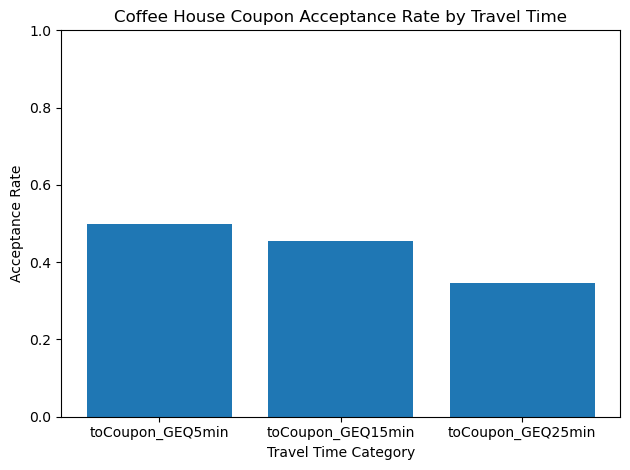

In [81]:
# Create bar chart of acceptance rates by travel time
acceptance_df = (
    pd.DataFrame.from_dict(
        acceptance_rates, orient="index", columns=["acceptance_rate"]
    )
    .reset_index()
    .rename(columns={"index": "travel_time"})
)

plt.bar(
    acceptance_df["travel_time"],
    acceptance_df["acceptance_rate"]
)

plt.title("Coffee House Coupon Acceptance Rate by Travel Time")
plt.xlabel("Travel Time Category")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [62]:
# Explore acceptance rates by gender
acceptance_by_gender = coffee_coupons.groupby("gender")["Y"].mean()
acceptance_by_gender

gender
Female    0.491699
Male      0.505925
Name: Y, dtype: float64

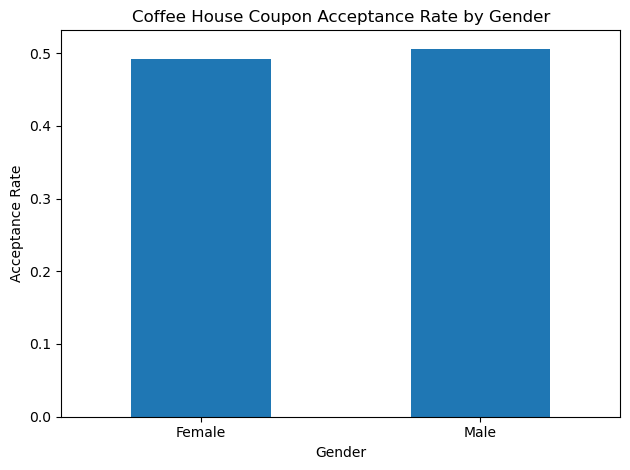

In [79]:
# Create bar plot for acceptance rate by gender
acceptance_by_gender.plot(kind="bar")
plt.title("Coffee House Coupon Acceptance Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# result = minimal difference

In [67]:
# Explore different passenger types
data["passanger"].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [68]:
# Sort into passenger type buckets for easier analysis
coffee_df = data.loc[data["coupon"] == "Coffee House"].copy()
coffee_df["passenger_type"] = coffee_df["passanger"].apply(passenger_type)

def passenger_type(p):
    if p == "Kid(s)":
        return "Child passenger"
    elif p == "Alone":
        return "Alone"
    else:
        return "Adult passenger"

coffee_df["passenger_type"] = coffee_df["passanger"].apply(passenger_type)

acceptance_by_passenger = (
    coffee_df.groupby("passenger_type")["Y"]
    .mean()
    .sort_values(ascending=False)
)

acceptance_by_passenger

passenger_type
Adult passenger    0.590850
Child passenger    0.480583
Alone              0.437639
Name: Y, dtype: float64

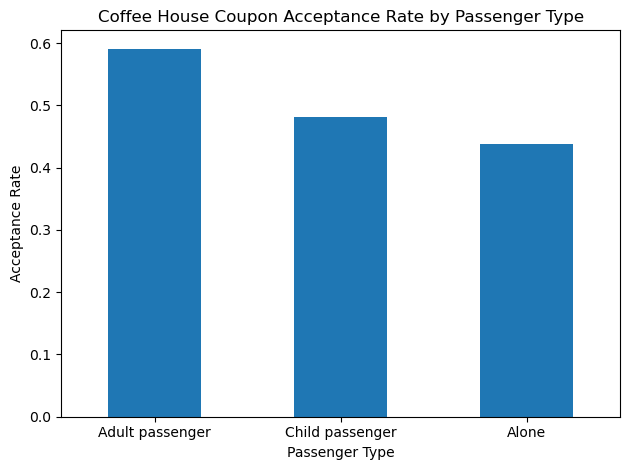

In [78]:
# Create bar chart of acceptance rate by passenger type - child, adult, alone.
acceptance_by_passenger.plot(kind="bar")
plt.title("Coffee House Coupon Acceptance Rate by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# result = more likely to accept if has an adult passenger

In [69]:
# explore unique destination types
data["destination"].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [70]:
# show acceptance rates by destination
coffee_df = data.loc[data["coupon"] == "Coffee House"].copy()

acceptance_by_destination = (
    coffee_df.groupby("destination")["Y"]
    .mean()
    .sort_values(ascending=False)
)

acceptance_by_destination

destination
No Urgent Place    0.580000
Work               0.445783
Home               0.361771
Name: Y, dtype: float64

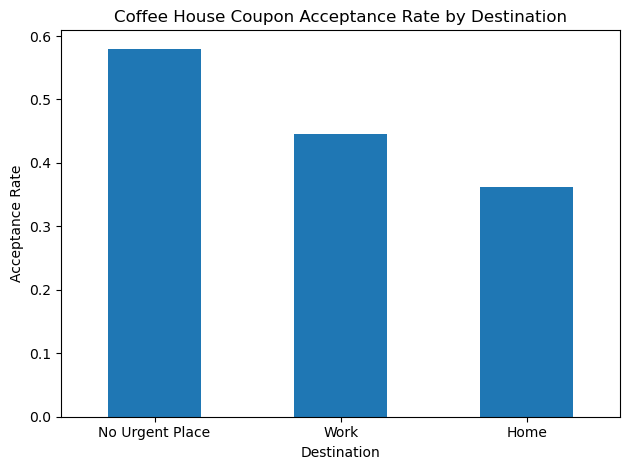

In [77]:
# create bar plot for acceptance rates by destination
acceptance_by_destination.plot(kind="bar")
plt.title("Coffee House Coupon Acceptance Rate by Destination")
plt.xlabel("Destination")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#result = more likely to accept coupon if not headed to home or work

In [71]:
# explore unique marital status values
data["maritalStatus"].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [83]:
# explore unique income range values
data["income"].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [88]:
# Create 6 conditions to focus on:
# 1. Not alone and not single
# 2. Alone and not single
# 3. Not alone and single
# 4. Alone & single
# 5. Destination in "Home or Work"
# 6. Destination = "No Urgent Place"
# 7. Low income
# 8. High income

cond1 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["passanger"] != "Alone") &
    (coffee_df["maritalStatus"] != "Single")
)

cond2 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["passanger"] == "Alone") &
    (coffee_df["maritalStatus"] != "Single")
)

cond3 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["passanger"] != "Alone") &
    (coffee_df["maritalStatus"] == "Single")
)

cond4 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["passanger"] == "Alone") &
    (coffee_df["maritalStatus"] == "Single")
)

cond5 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["destination"].isin(["Home", "Work"]))
)

cond6 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["destination"] == "No Urgent Place")
)

cond7 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["income"].isin([
        "Less than $12500",
        "$12500 - $24999",
        "$25000 - $37499",
        "$37500 - $49999"
    ]))
)

cond8 = (
    (coffee_df["toCoupon_GEQ5min"] == 1) &
    (coffee_df["income"].isin([
        "50000 - $62499",
        "$62500 - $74999",
        "$75000 - $87499",
        "$87500 - $99999",
        "$100000 or More"
    ]))
)

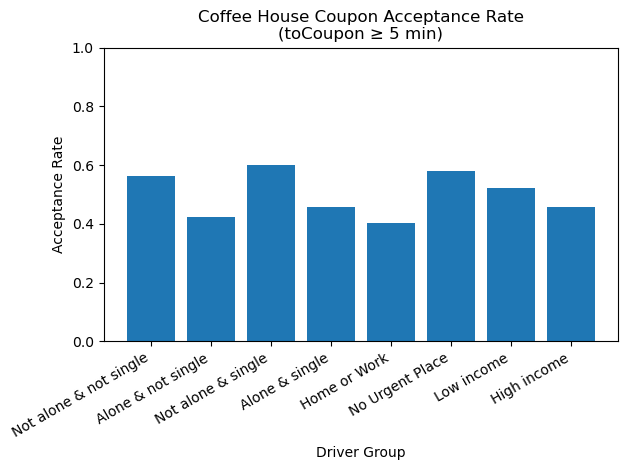

In [89]:
# create bar chart to display these 6 conditions for side-by-side comparison
acceptance_rates = {
    "Not alone & not single": coffee_df.loc[cond1, "Y"].mean(),
    "Alone & not single": coffee_df.loc[cond2, "Y"].mean(),
    "Not alone & single": coffee_df.loc[cond3, "Y"].mean(),
    "Alone & single": coffee_df.loc[cond4, "Y"].mean(),
    "Home or Work": coffee_df.loc[cond5, "Y"].mean(),
    "No Urgent Place": coffee_df.loc[cond6, "Y"].mean(),
    "Low income": coffee_df.loc[cond7, "Y"].mean(),
    "High income": coffee_df.loc[cond8, "Y"].mean()
}

plot_df = (
    pd.DataFrame.from_dict(
        acceptance_rates,
        orient="index",
        columns=["acceptance_rate"]
    )
    .reset_index()
    .rename(columns={"index": "group"})
)

plt.bar(plot_df["group"], plot_df["acceptance_rate"])
plt.title("Coffee House Coupon Acceptance Rate\n(toCoupon ≥ 5 min)")
plt.xlabel("Driver Group")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()